In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

11490434/11490434 [==============================] - 0s 0us/step


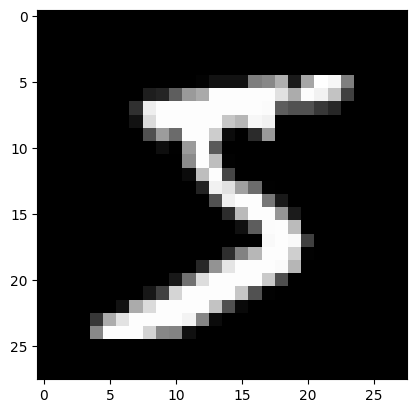

In [2]:
## Preprocess the dataset.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape

X_test.shape

single_image= X_train[0]

single_image.shape

plt.imshow(single_image,cmap='gray')

In [3]:
y_train.shape

X_train.min()

X_train.max()

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

X_train_scaled.min()

X_train_scaled.max()

1.0

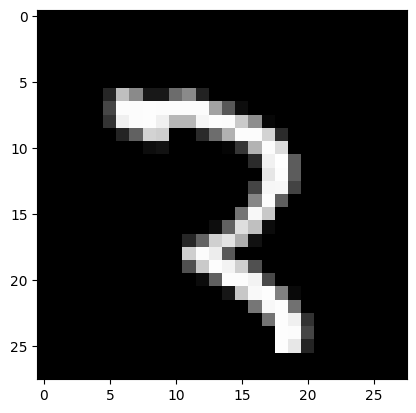

In [4]:
y_train[0]

y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

type(y_train_onehot)

y_train_onehot.shape

single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

y_train_onehot[500]

X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [5]:
## Create and train your model.
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 64)                346176    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 347146 (1.32 MB)
Trainable params: 347146 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

Epoch 1/8
469/469 [==============================] - 58s 121ms/step - loss: 0.2695 - accuracy: 0.9231 - val_loss: 0.1088 - val_accuracy: 0.9678
Epoch 2/8
469/469 [==============================] - 24s 52ms/step - loss: 0.0916 - accuracy: 0.9736 - val_loss: 0.0694 - val_accuracy: 0.9776
Epoch 3/8
469/469 [==============================] - 24s 52ms/step - loss: 0.0614 - accuracy: 0.9820 - val_loss: 0.0578 - val_accuracy: 0.9812
Epoch 4/8
469/469 [==============================] - 24s 52ms/step - loss: 0.0456 - accuracy: 0.9867 - val_loss: 0.0541 - val_accuracy: 0.9834
Epoch 5/8
469/469 [==============================] - 23s 49ms/step - loss: 0.0368 - accuracy: 0.9895 - val_loss: 0.0563 - val_accuracy: 0.9815
Epoch 6/8
469/469 [==============================] - 25s 52ms/step - loss: 0.0299 - accuracy: 0.9915 - val_loss: 0.0497 - val_accuracy: 0.9832
Epoch 7/8
469/469 [==============================] - 24s 51ms/step - loss: 0.0255 - accuracy: 0.9926 - val_loss: 0.0497 - val_accuracy: 0.983

<Axes: >

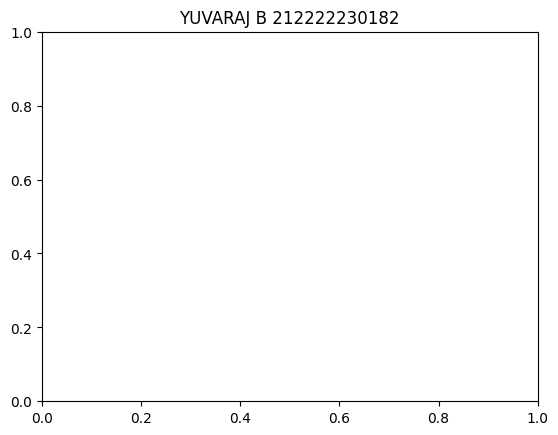

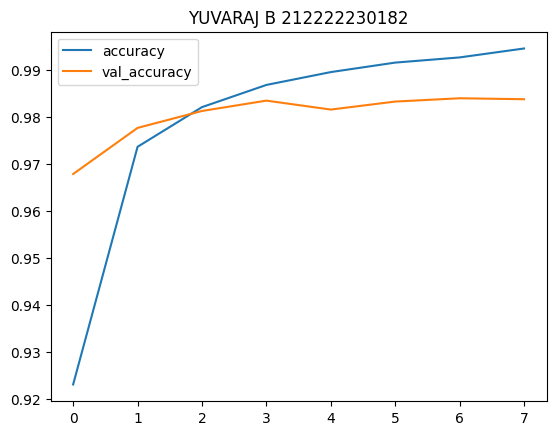

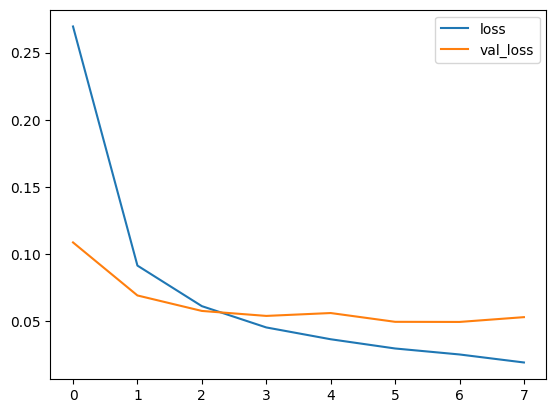

In [6]:
## Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

## Fit the model
model.fit(X_train_scaled ,y_train_onehot, epochs=8,batch_size=128, validation_data=(X_test_scaled,y_test_onehot))

## Include the training loss, validation loss vs iteration plot.
metrics = pd.DataFrame(model.history.history)
metrics.head()

plt.title("YUVARAJ B 212222230182")
metrics[['accuracy','val_accuracy']].plot()

plt.title("YUVARAJ B 212222230182")
metrics[['loss','val_loss']].plot()

313/313 [==============================] - 2s 5ms/step
[[ 973    0    2    1    0    1    2    0    1    0]
 [   0 1128    1    1    1    0    3    0    1    0]
 [   2    2 1012    4    2    0    2    3    5    0]
 [   0    0    0 1002    0    2    0    1    5    0]
 [   0    0    0    0  975    0    2    0    1    4]
 [   1    0    1    9    0  870    7    0    2    2]
 [   5    2    0    0    2    2  946    0    1    0]
 [   0    4    7    5    5    0    0  988    5   14]
 [   5    0    2    1    2    0    1    2  958    3]
 [   2    2    0    4    8    2    0    1    5  985]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99  

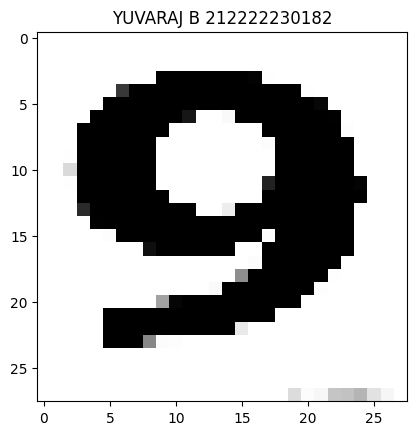

In [10]:
## Test the model for your handwritten scanned images.
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

plt.title("YUVARAJ B 212222230182")
print(confusion_matrix(y_test,x_test_predictions))

plt.title("YUVARAJ B 212222230182")
print(classification_report(y_test,x_test_predictions))

# Prediction for a single input
img = image.load_img('/content/9.jpg')
type(img)

img = image.load_img('/content/9.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

print(x_single_prediction)

plt.title("YUVARAJ B 212222230182")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

plt.title("YUVARAJ B 212222230182")
print(x_single_prediction)